In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import Bunch


In [2]:
digits_data: Bunch = load_digits()


In [3]:
print(digits_data)
print("--------")
print(type(digits_data))
print("--------")
print(len(digits_data))

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)), 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_

In [4]:
print(digits_data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
list(digits_data)

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [6]:
for element in list(digits_data):
    print(element)

data
target
frame
feature_names
target_names
images
DESCR


In [7]:
X       = digits_data['data']     
y       = digits_data['target']
images  = digits_data['images']   
labels  = digits_data['target_names']  
descr   = digits_data['DESCR']    

In [8]:
images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [9]:
X[0].shape

(64,)

In [10]:
image = np.reshape(digits_data.data[0],(8,8))
image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

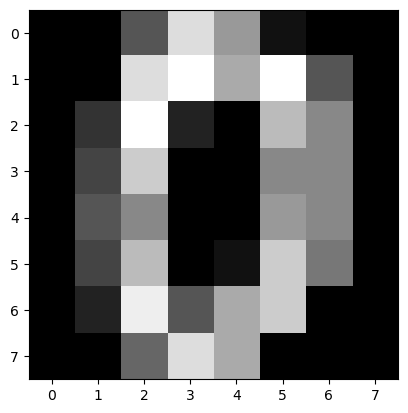

In [11]:
plt.imshow(image,cmap='gray')

In [12]:
y[0]

np.int64(0)

In [13]:
X.min(), X.max()

(np.float64(0.0), np.float64(16.0))

In [14]:
X.shape, y.shape

((1797, 64), (1797,))

In [15]:
digits_data.data.shape, digits_data.target.shape

((1797, 64), (1797,))

1) Separar los datos de entrenamiento y de prueba

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_data.data, digits_data.target, test_size=0.2, random_state=0)

2. Entrenar el modelo

In [17]:
model_log_regression = LogisticRegression(max_iter=5000)
model_log_regression.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [18]:
y_test_predict = model_log_regression.predict(X_test)
y_test_predict

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(0.5, 137.22222222222217, 'Predicted label')

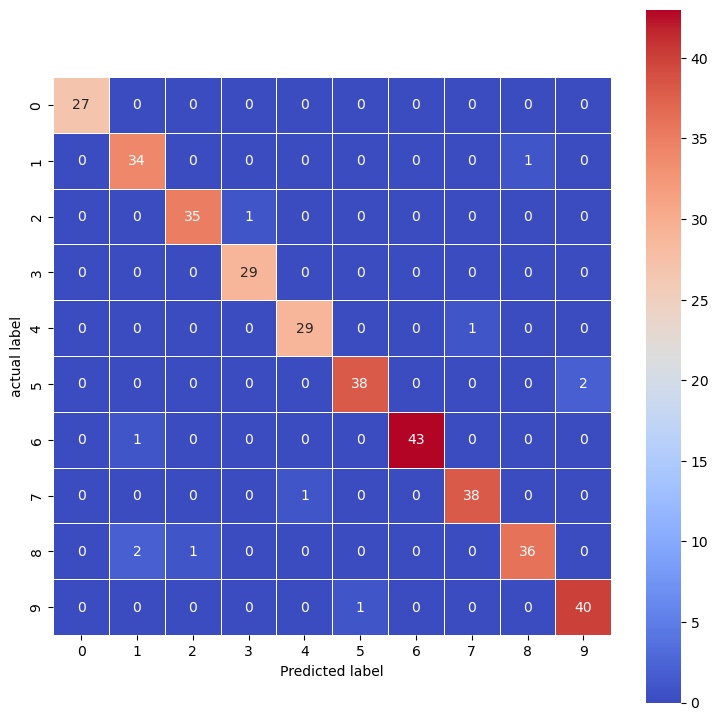

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('actual label')
plt.xlabel('Predicted label')

3. Evaluar el modelo

In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [22]:
# 1. Predictions
y_pred = model_log_regression.predict(X_test)
y_prob = model_log_regression.predict_proba(X_test)

In [23]:
# 2. Metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Precision, recall y F1 para multiclas:
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall    (macro):", recall_score(   y_test, y_pred, average='macro'))
print("F1-score  (macro):", f1_score(     y_test, y_pred, average='macro'))

Accuracy:  0.9694444444444444
Precision (macro): 0.969854634854635
Recall    (macro): 0.9710635841123647
F1-score  (macro): 0.9702498061471447


In [24]:
# 3. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [25]:
# 4. Reporte completo
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       0.97      0.95      0.96        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.97      0.92      0.95        39
           9       0.95      0.98      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [26]:
# Calculamos AUC usando One-vs-Rest y promedio macro:
global_auc = roc_auc_score(
    y_test,
    y_prob,
    multi_class='ovr',
    average='macro'
)
print("Multiclass AUC (OVR, macro):", global_auc)

Multiclass AUC (OVR, macro): 0.9988081650543401


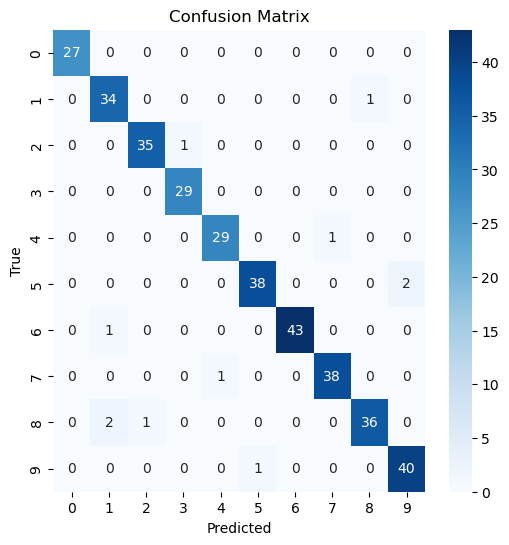

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        27
           1      0.919     0.971     0.944        35
           2      0.972     0.972     0.972        36
           3      0.967     1.000     0.983        29
           4      0.967     0.967     0.967        30
           5      0.974     0.950     0.962        40
           6      1.000     0.977     0.989        44
           7      0.974     0.974     0.974        39
           8      0.973     0.923     0.947        39
           9      0.952     0.976     0.964        41

    accuracy                          0.969       360
   macro avg      0.970     0.971     0.970       360
weighted avg      0.970     0.969     0.969       360



In [28]:
y_pred = model_log_regression.predict(X_test)

# 1b. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 1c. Full text report
print(classification_report(y_test, y_pred, digits=3))

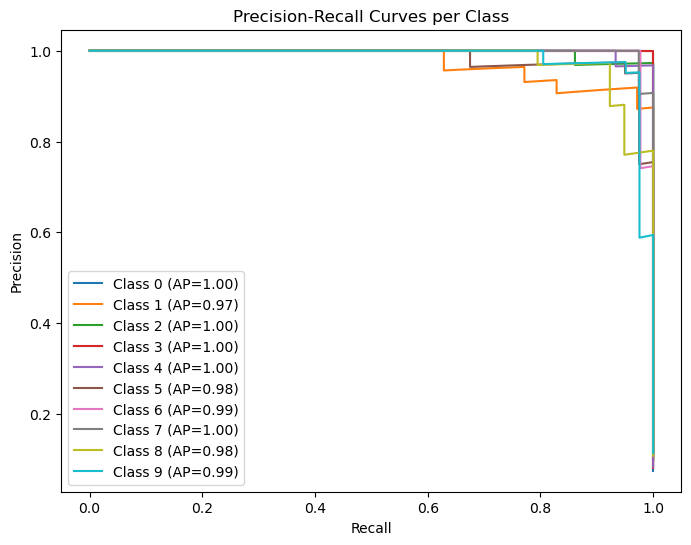

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves per Class")
plt.legend(loc="best")
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model_log_regression, 
    X, y, 
    cv=5, 
    scoring="accuracy"
)
print("CV Accuracies: ", np.round(scores,3))
print("Mean CV Acc.: ", scores.mean())

CV Accuracies:  [0.922 0.872 0.942 0.942 0.897]
Mean CV Acc.:  0.9148777468276075


In [32]:
import pandas as pd

coefs = pd.Series(model_log_regression.coef_.ravel())
coefs = coefs.abs().sort_values(ascending=False)
print("Top 10 most influential features:\n", coefs.head(10))

Top 10 most influential features:
 619    0.753134
68     0.744768
299    0.637318
83     0.625581
550    0.582528
597    0.520723
235    0.517077
341    0.511710
297    0.499175
460    0.487462
dtype: float64


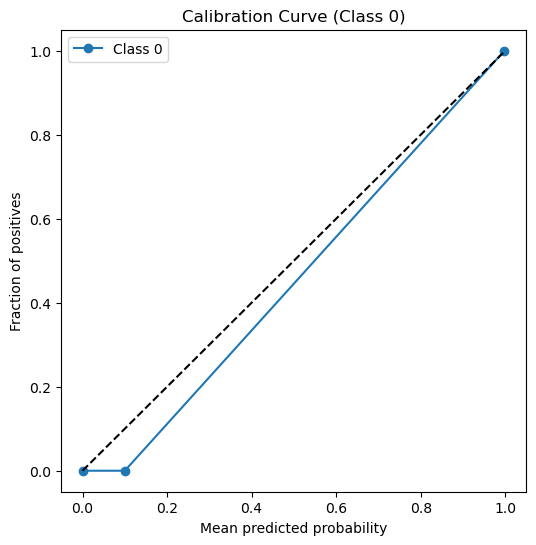

In [33]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(6,6))
prob_true, prob_pred = calibration_curve(y_test_bin[:,0], y_prob[:,0], n_bins=10)
plt.plot(prob_pred, prob_true, marker="o", label="Class 0")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve (Class 0)")
plt.legend()
plt.show()

## Guardar el modelo

In [36]:
from utils.paths import MODELS_DIR
import joblib

In [37]:
model_log_regression_path = str(MODELS_DIR / "model_log_regression.joblib")

joblib.dump(model_log_regression, model_log_regression_path)

['/Users/jssdev/Dev/Learning/Platzi/platzi-logistic-regression/models/model_log_regression.joblib']

In [38]:
from datetime import datetime

In [39]:
feature_names = digits_data.feature_names 

In [40]:
feature_names


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [41]:
metadata = {
    "model": model_log_regression.__class__.__name__,            
    "version": "v1",
    "date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "best_params": model_log_regression.get_params(),                
    "scaler": None,                                  
    "features": feature_names,                        
    "target_names": digits_data.target_names.tolist(),      
    "dataset": "sklearn.datasets.load_digits"
}

In [42]:
import json

meta_model_log_regression_path = str(MODELS_DIR / "meta_model_log_regression.json")

with open(meta_model_log_regression_path, "w") as f:
    json.dump(metadata, f, indent=4)